# Problem Statement 1:
Explore the relationship between interest rates and bond prices. Start by creating a coupon bond with a 5 year maturity, paying a 6% coupon semiannually. Also, create a at yield curve with a 7% rate level.
<ol>
    <li> Start exploring the basic relationship between bond price and interest rates, by pricing your bond with a flat yield curve with rate levels varying between 5% and 9%. Use the shift method of the curve object to perturb your rate level from the 7% base level you first used.</li>
    <li> Now, investigate the effect of maturity. While keeping the same coupons, create new bond objects with maturities of 6, 8, 10, 15, and 20 years, and for each bond, carry out the same exercise as in (1). What can you conclude about the yield sensitivity of bond prices, and how matirity effects it? </li>
    <li> Now we'll look at the effect of coupons. Again, starting from the bond in (1), leaving maturity constant, try coupon rates of 8%, 10%, 15%, 20%, and 30%. Can you characterize the coupon erect on the yield sensitivity of bonds?</li>
    </ol>

In [1]:
import fixedincome as fi
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

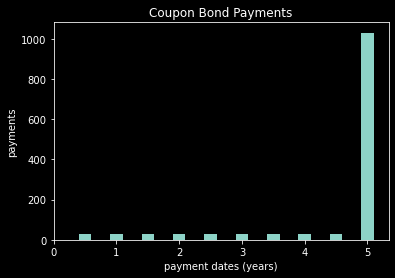

In [2]:
bond1 = fi.create_coupon_bond(maturity=5.0, face=1000, rate=6, frequency=2)
bond1.plot_payments()

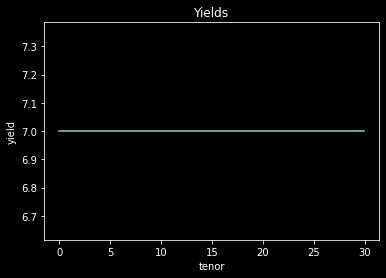

In [3]:
# Initiating a yield curve
yc = fi.curve_factory(dates=[30], rates=[7.0])
yc.plot_yields()

### Part 1: 

Start exploring the basic relationship between bond price and interest rates, by pricing your bond with a flat yield curve with rate levels varying between 5% and 9%. Use the shift method of the curve object to perturb your rate level from the 7% base level you first used

In [4]:
yc1 = yc.shift(-2.0)
yc2 = yc.shift(-1.0)
yc3 = yc
yc4 = yc.shift(1.0)
yc5 = yc.shift(2.0)

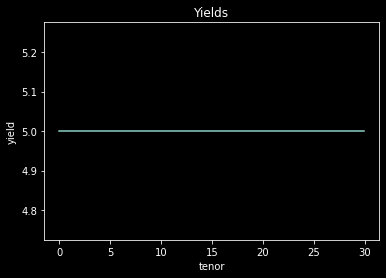

In [5]:
yc1.plot_yields()

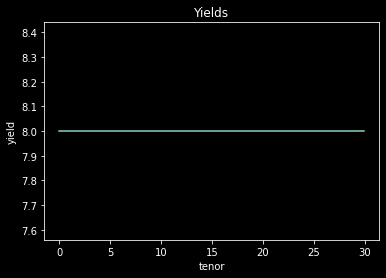

In [6]:
yc4.plot_yields()

In [7]:
price1 = bond1.price(yc1)
price2 = bond1.price(yc2)
price3 = bond1.price(yc3)
price4 = bond1.price(yc4)
price5 = bond1.price(yc5)

In [8]:
prices = [price1, price2, price3, price4, price5]
print(prices)

[1040.9356799388404, 996.1317116521013, 953.4087448559137, 912.6677793157278, 873.8145716053792]


In [9]:
rates = [5.0, 6.0, 7.0, 8.0, 9.0]

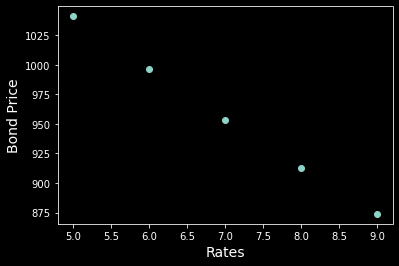

In [10]:
plt.scatter(rates, prices)
plt.xlabel("Rates", fontsize=14)
plt.ylabel("Bond Price", fontsize=14)
plt.show()

__Comment:__So, as the interest rate, the rate at which we are discounting the bond’s coupons, goes up,
the price goes down, as we would expect. 

### Part 2:

Now, investigate the effect of maturity. While keeping the same coupons, create new bond objects with maturities of 6, 8, 10, 15, and 20 years, and for each bond, carry out the same exercise as in (1). What can you conclude about the yield sensitivity of bond prices, and how matirity effects it?

In [11]:
bond2 = fi.create_coupon_bond(maturity=6.0, face=1000, rate=6, frequency=2)
bond3 = fi.create_coupon_bond(maturity=8.0, face=1000, rate=6, frequency=2)
bond4 = fi.create_coupon_bond(maturity=10.0, face=1000, rate=6, frequency=2)
bond5 = fi.create_coupon_bond(maturity=15.0, face=1000, rate=6, frequency=2)
bond6 = fi.create_coupon_bond(maturity=20.0, face=1000, rate=6, frequency=2)

In [12]:
bonds = [bond1, bond2, bond3, bond4, bond5, bond6]
yield_curves = [yc1, yc2, yc3, yc4, yc5]

In [13]:
bond_prices = [prices, [], [], [], [], []]

In [14]:
for i in range(1,6):
    for j in range(5):
        price = bonds[i].price(yield_curves[j])
        bond_prices[i].append(price)

In [15]:
bond_prices

[[1040.9356799388404,
  996.1317116521013,
  953.4087448559137,
  912.6677793157278,
  873.8145716053792],
 [1047.964827866354,
  995.4878188265034,
  945.8923986328464,
  899.0157194729078,
  854.7042471477047],
 [1061.0113962658972,
  994.3103416938472,
  932.3498063770527,
  874.779761868498,
  821.2764409152844],
 [1072.8164195307695,
  993.2660131611274,
  920.5764422708303,
  854.1272411262519,
  793.3551901365157],
 [1097.6451644898598,
  991.1430515040338,
  897.4399096810812,
  814.8863448721312,
  742.0520234498931],
 [1116.9818105066793,
  989.5703228266502,
  881.1358707276961,
  788.5823854885891,
  709.3396801031582]]

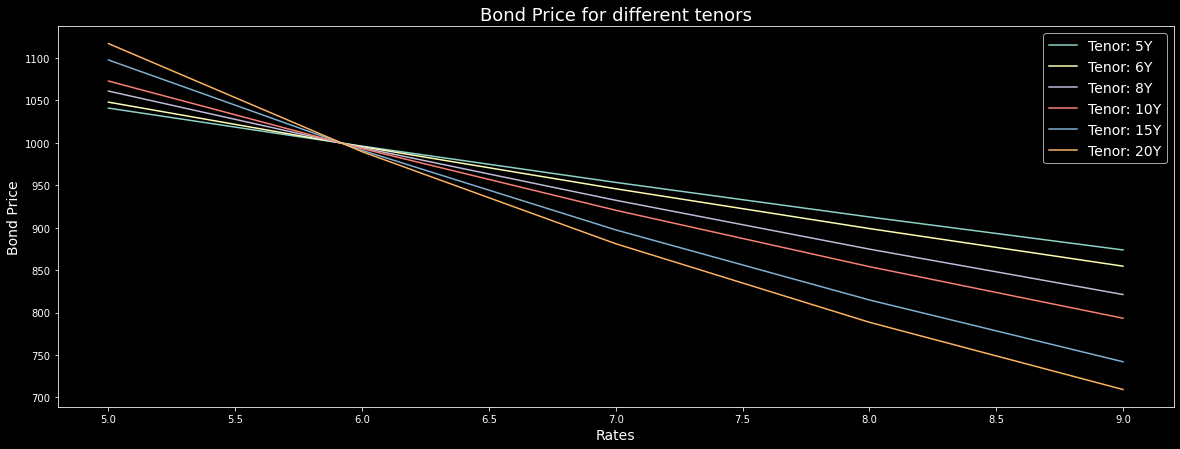

In [16]:
plt.figure(figsize=(20,7))
plt.plot(rates, bond_prices[0], label="Tenor: 5Y")
plt.plot(rates, bond_prices[1], label="Tenor: 6Y")
plt.plot(rates, bond_prices[2], label="Tenor: 8Y")
plt.plot(rates, bond_prices[3], label="Tenor: 10Y")
plt.plot(rates, bond_prices[4], label="Tenor: 15Y")
plt.plot(rates, bond_prices[5], label="Tenor: 20Y")
plt.xlabel("Rates", fontsize=14)
plt.ylabel("Bond Price", fontsize=14)
plt.title("Bond Price for different tenors", fontsize=18)
plt.legend(fontsize=14)
plt.show()

__Comments:__ The longer the bond maturity, the steeper is the slope of the price as a function of the discounting
rate. This indicates that the longer maturity bonds are more sensitive to interest rate
fluctuations than shorter maturity bonds.

### Part 3:

Now we'll look at the effect of coupons. Again, starting from the bond in (1), leaving maturity constant, try coupon rates of 8%, 10%, 15%, 20%, and 30%. Can you characterize the coupon erect on the yield sensitivity of bonds?

In [17]:
bond11 = bond1
bond12 = fi.create_coupon_bond(maturity=6.0, face=1000, rate=8, frequency=2)
bond13 = fi.create_coupon_bond(maturity=6.0, face=1000, rate=10, frequency=2)
bond14 = fi.create_coupon_bond(maturity=6.0, face=1000, rate=15, frequency=2)
bond15 = fi.create_coupon_bond(maturity=6.0, face=1000, rate=20, frequency=2)
bond16 = fi.create_coupon_bond(maturity=6.0, face=1000, rate=25, frequency=2)

In [18]:
bonds = [bond11, bond12, bond13, bond14, bond15, bond16]
yield_curves = [yc1, yc2, yc3, yc4, yc5]

In [19]:
bond_prices = [prices, [], [], [], [], []]

In [20]:
for i in range(1,6):
    for j in range(5):
        price = bonds[i].price(yield_curves[j])
        bond_prices[i].append(price)

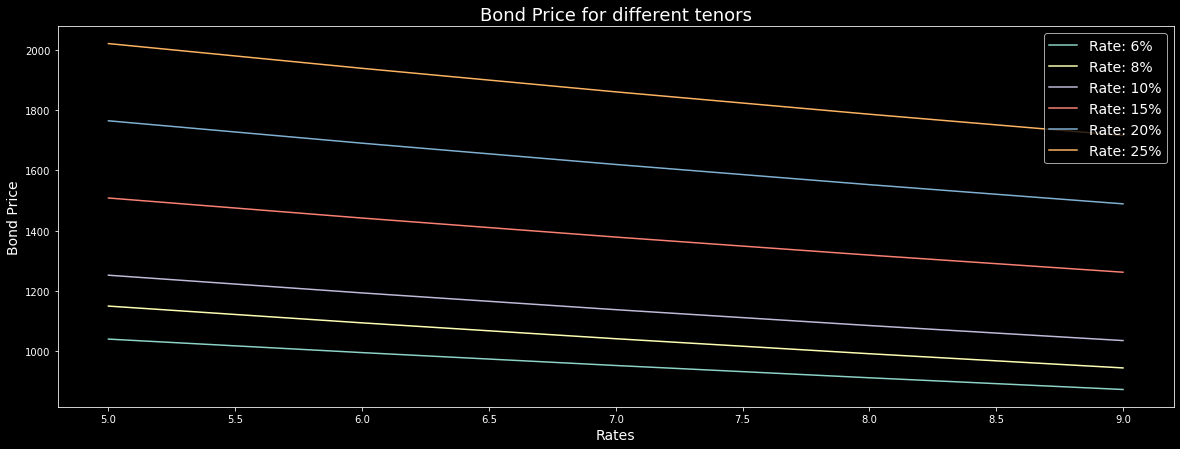

In [21]:
plt.figure(figsize=(20,7))
plt.plot(rates, bond_prices[0], label="Rate: 6%")
plt.plot(rates, bond_prices[1], label="Rate: 8%")
plt.plot(rates, bond_prices[2], label="Rate: 10%")
plt.plot(rates, bond_prices[3], label="Rate: 15%")
plt.plot(rates, bond_prices[4], label="Rate: 20%")
plt.plot(rates, bond_prices[5], label="Rate: 25%")
plt.xlabel("Rates", fontsize=14)
plt.ylabel("Bond Price", fontsize=14)
plt.title("Bond Price for different tenors", fontsize=18)
plt.legend(fontsize=14)
plt.show()

__Comments:__ While it is no surprise that the bond price is an increasing function of the coupon value, a consequence of the seeming (again, it is not really true) constancy of the slope for the different bonds, is that in relative terms the higher coupon bonds are less sensitive to price fluctuations.